In [2]:
import seaborn as sns
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

plt.style.use('default')

In [ ]:
results_df = pd.read_csv('./runs/PID2/CID0/v10l/results.csv')

results_df['train/total_loss'] = results_df[['train/box_loss', 'train/cls_loss', 'train/dfl_loss']].sum(axis=1)
results_df['val/total_loss'] = results_df[['val/box_loss', 'val/cls_loss', 'val/dfl_loss']].sum(axis=1)

used_df = results_df[['epoch', 'train/total_loss', 'val/total_loss', 'metrics/mAP50(B)', 'metrics/mAP50-95(B)']]

In [ ]:
used_df

,epoch,train/total_loss,val/total_loss,metrics/mAP50(B),metrics/mAP50-95(B)
0,1,8.21181,9.06770,0.37356,0.34975
1,2,4.05273,5.06615,0.87296,0.80422
2,3,3.97853,3.31084,0.93591,0.89275
3,4,3.88502,3.64217,0.91966,0.86804
4,5,3.77284,3.26761,0.94319,0.89266
...,...,...,...,...,...
95,96,2.07719,3.00287,0.96792,0.92984
96,97,2.03061,3.01090,0.96826,0.92998
97,98,2.07326,3.00414,0.96842,0.93138
98,99,2.03940,2.99453,0.96865,0.93152


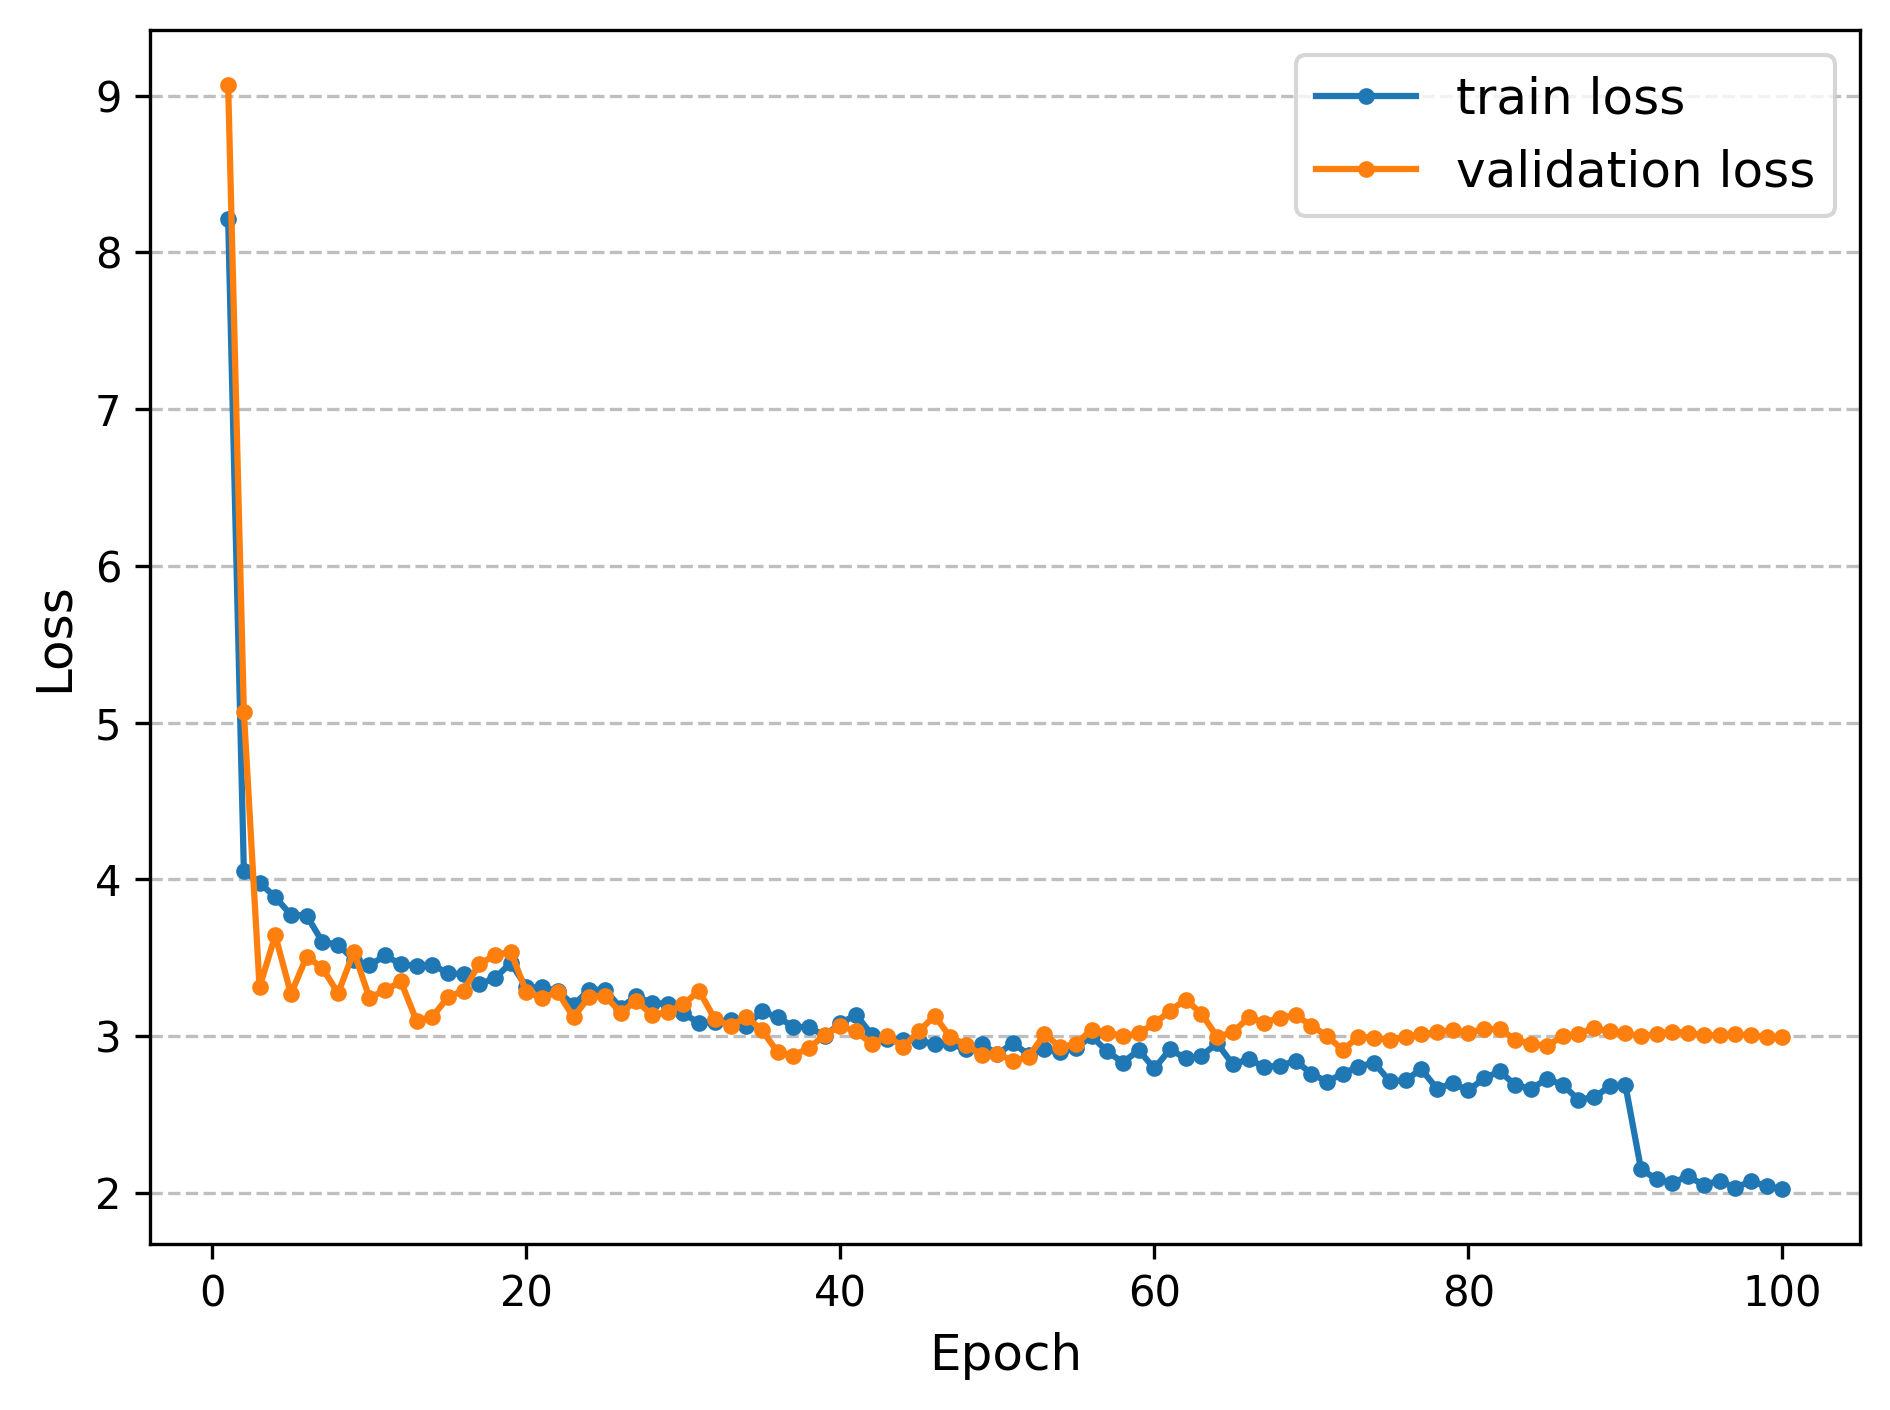

In [4]:
# Loss 값 시각화
plt.figure(dpi=300)
sns.lineplot(x='epoch', y='train/total_loss', data=used_df, label='train loss', marker='o', markersize=4, markeredgecolor='none')
sns.lineplot(x='epoch', y='val/total_loss', data=used_df, label='validation loss', marker='o', markersize=4, markeredgecolor='none')

# 그래프 제목 및 레이블 설정
plt.xlabel('Epoch', fontsize=12)
plt.ylabel('Loss', fontsize=12)
plt.xticks(range(0, 101, 20))  # x축 눈금 설정
plt.grid(axis='y', linestyle='--', alpha=0.8)

# 범례 설정
plt.legend(fontsize='12', loc='upper right', framealpha=0.8)

plt.tight_layout()

# 그래프 표시
plt.show()

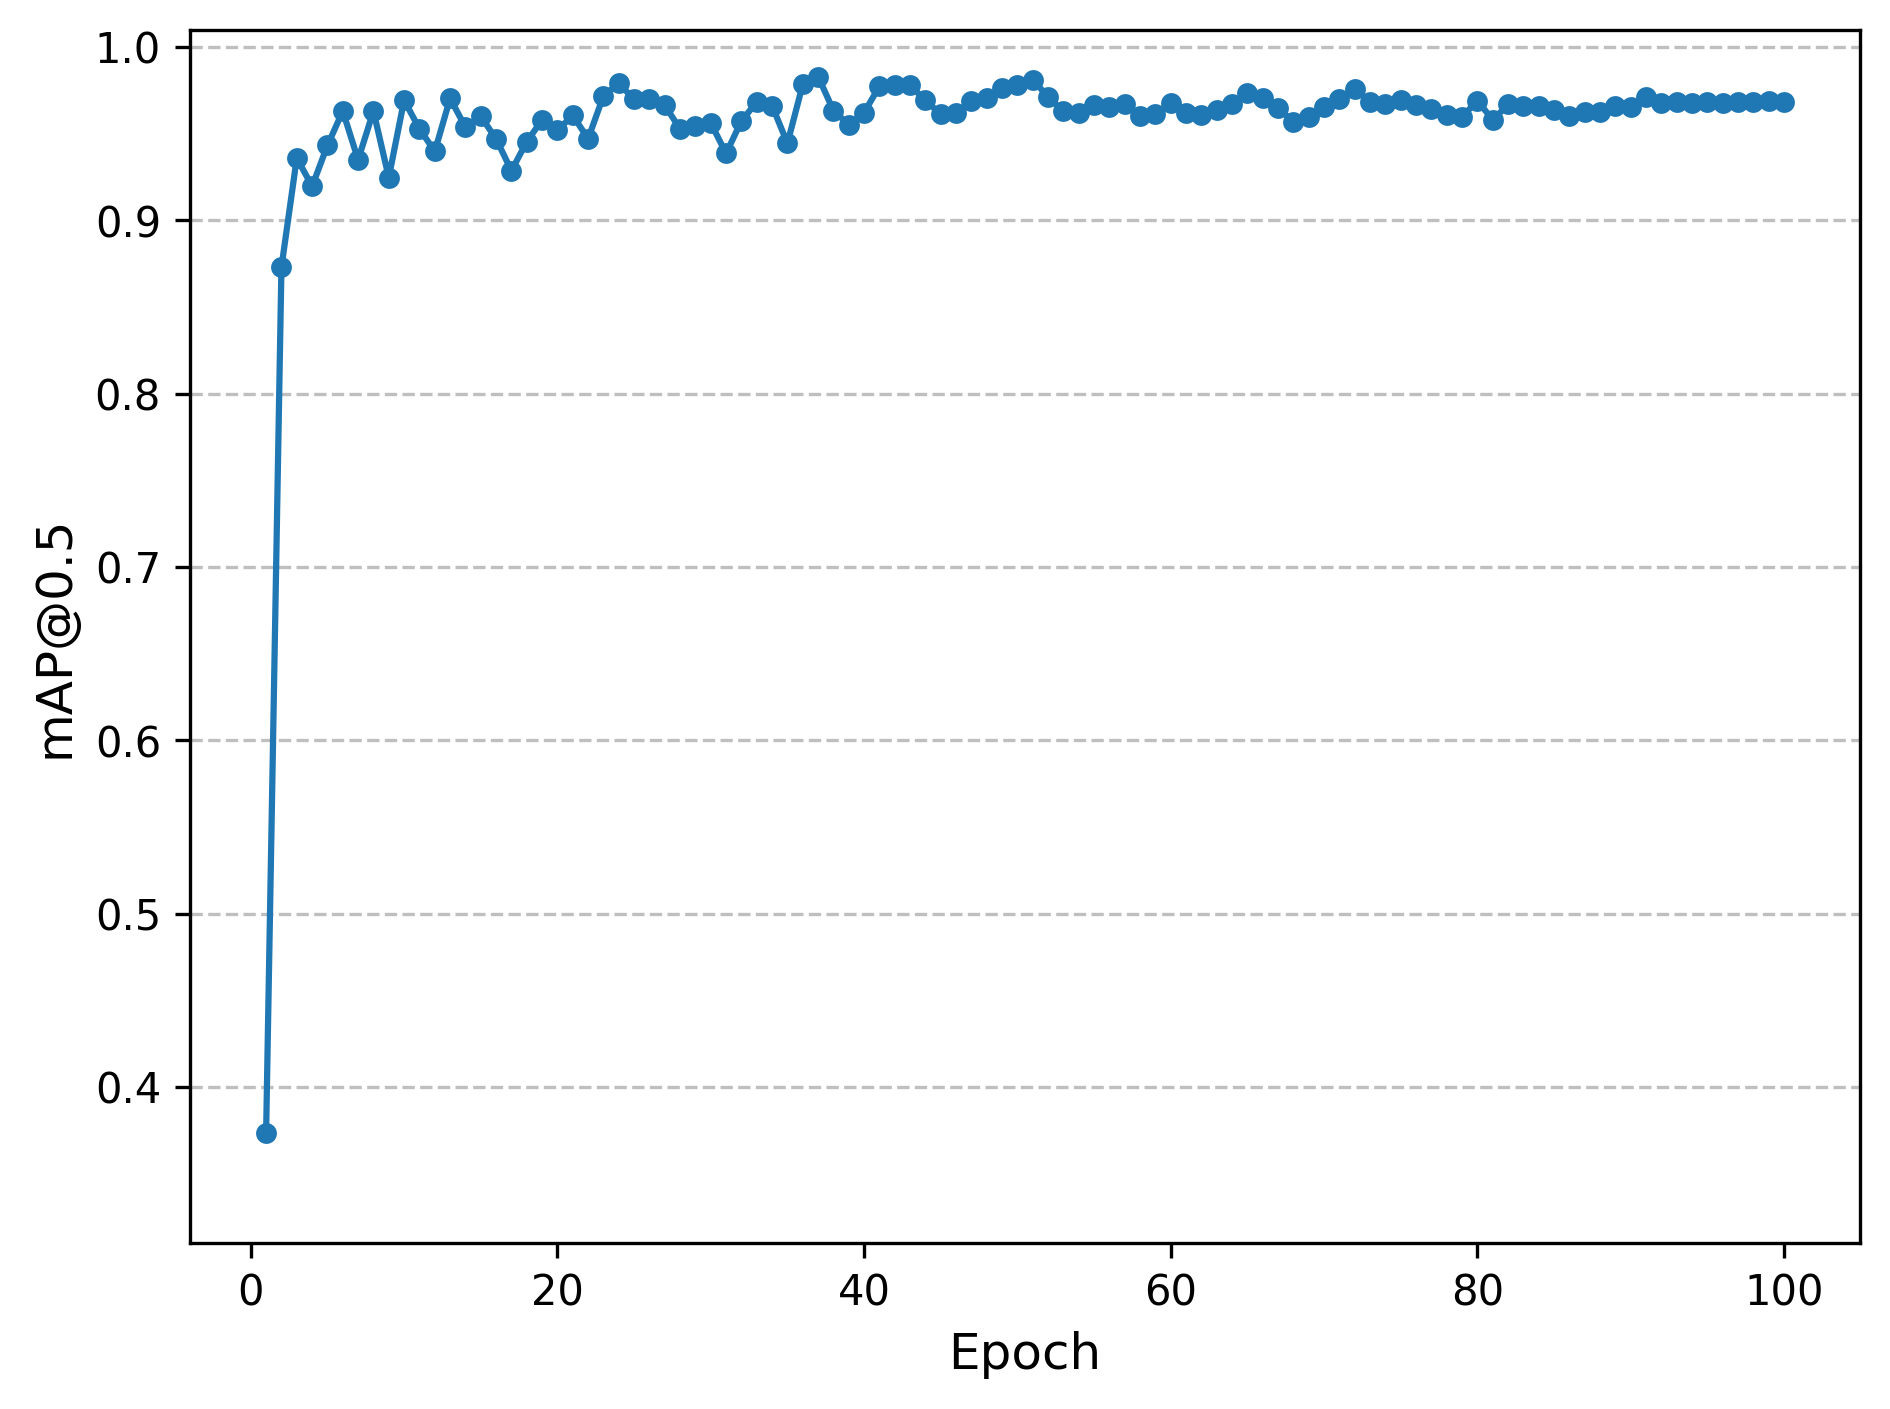

In [16]:
# mAP50 값 시각화
plt.figure(dpi=300)
sns.lineplot(x='epoch', y='metrics/mAP50(B)', data=used_df, marker='o', markeredgecolor='none', markersize=5)

# 그래프 제목 및 레이블 설정
#plt.title('mAP@0.5 over Epochs', fontsize=15)
plt.xlabel('Epoch', fontsize=12)
plt.ylabel('mAP@0.5', fontsize=12)
plt.xticks(range(0, 101, 20))  # x축 눈금 설정
plt.grid(axis='y', linestyle='--', alpha=0.8)

plt.ylim(0.31, 1.01)  # y축 범위 설정
plt.tight_layout()

# 그래프 표시
plt.show()

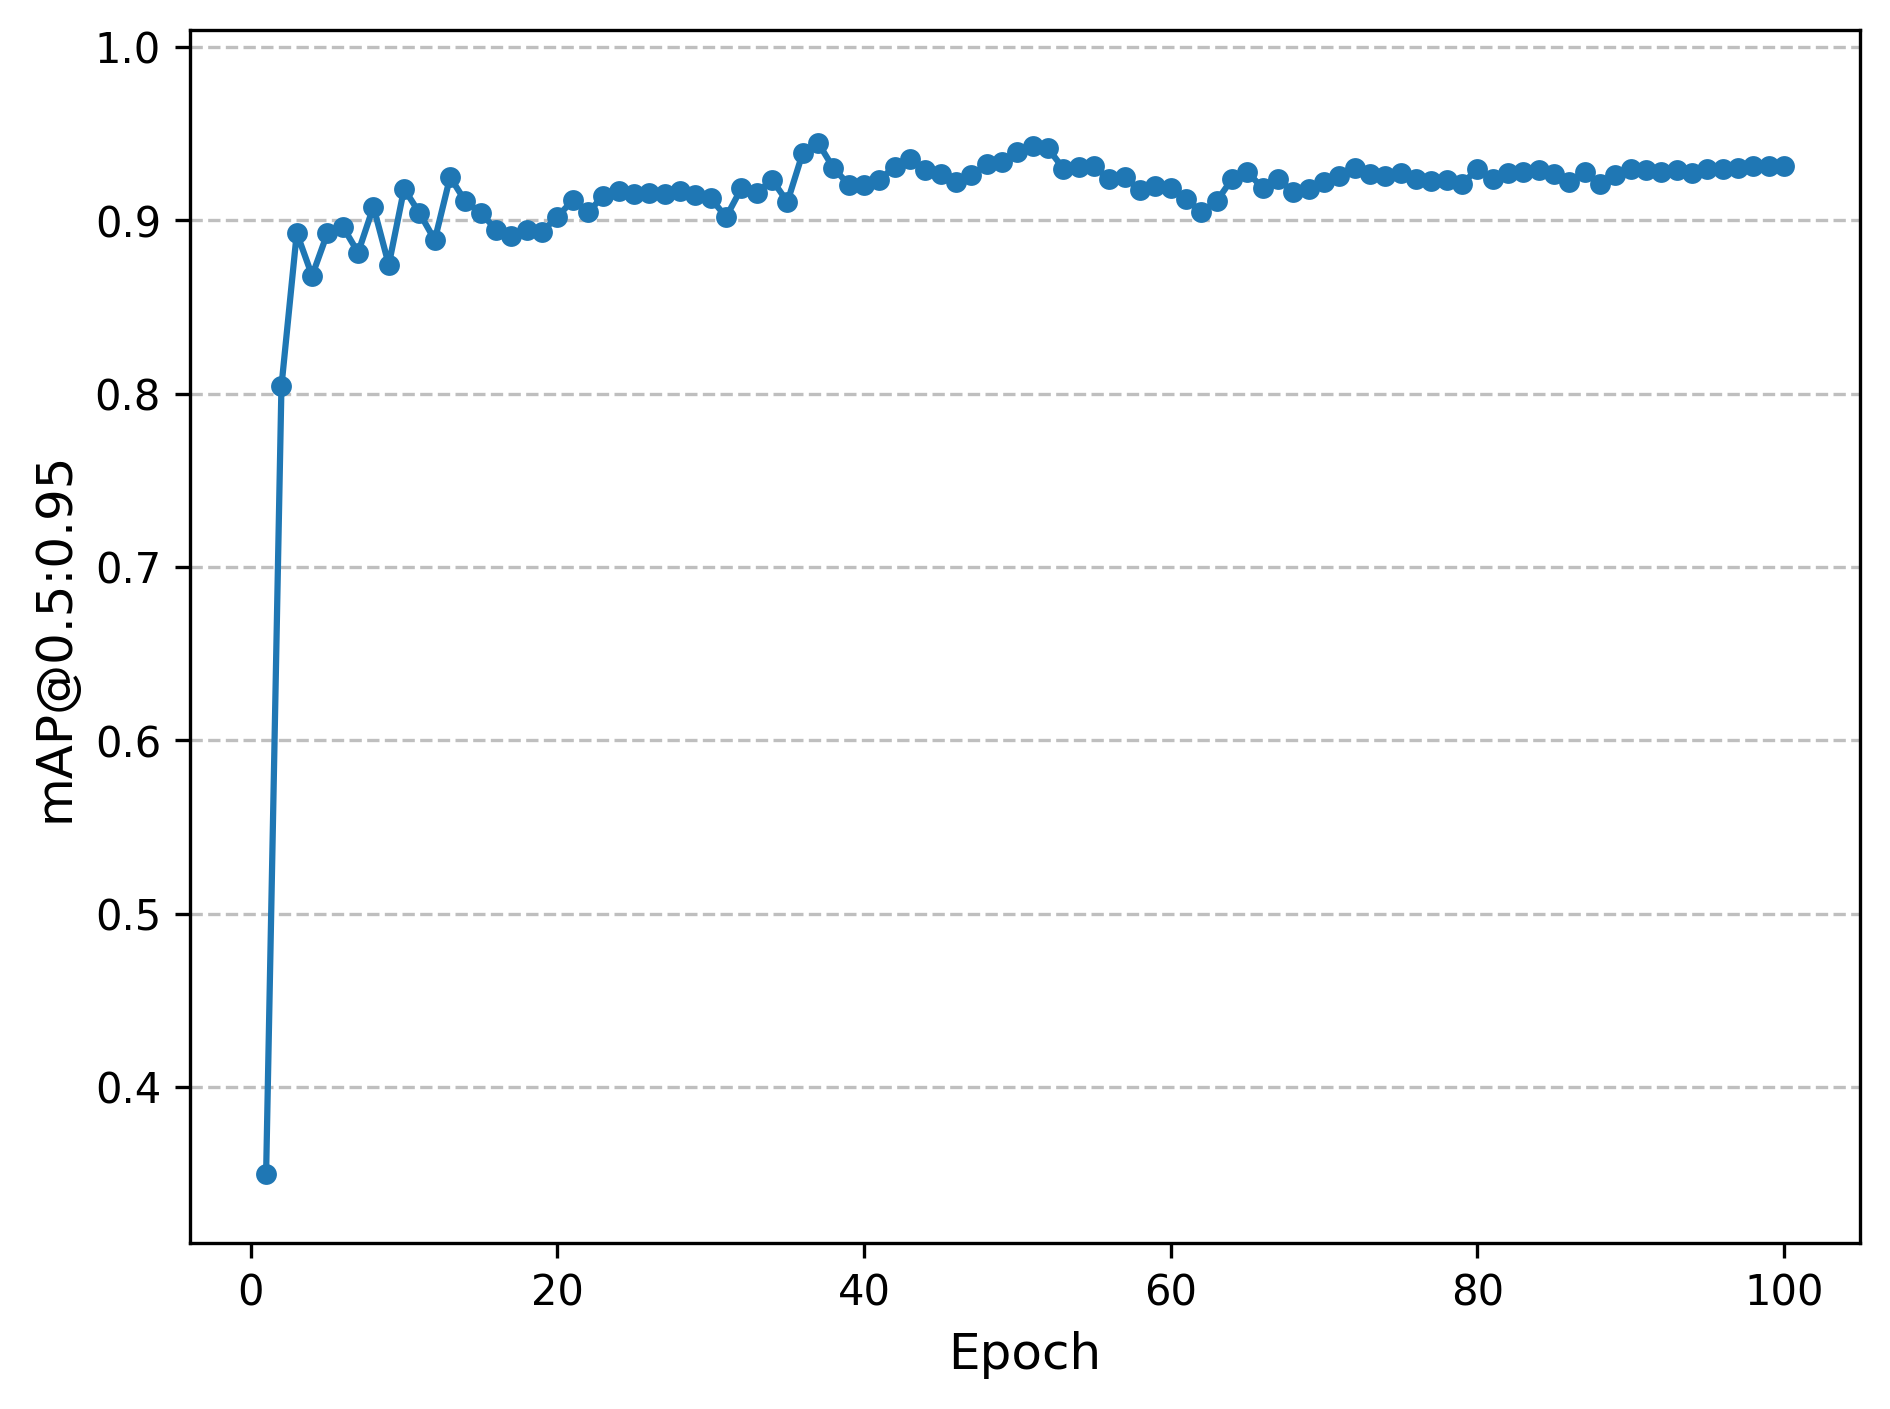

In [15]:
# mAP50-95 값 시각화
plt.figure(dpi=300)
sns.lineplot(x='epoch', y='metrics/mAP50-95(B)', data=used_df, marker='o', markeredgecolor='none', markersize=5)

# 그래프 제목 및 레이블 설정
#plt.title('mAP@0.5:0.95 over Epochs', fontsize=15)
plt.xlabel('Epoch', fontsize=12)
plt.ylabel('mAP@0.5:0.95', fontsize=12)
plt.xticks(range(0, 101, 20))  # x축 눈금 설정
plt.grid(axis='y', linestyle='--', alpha=0.8)

plt.ylim(0.31, 1.01)  # y축 범위 설정
plt.tight_layout()

# 그래프 표시
plt.show()

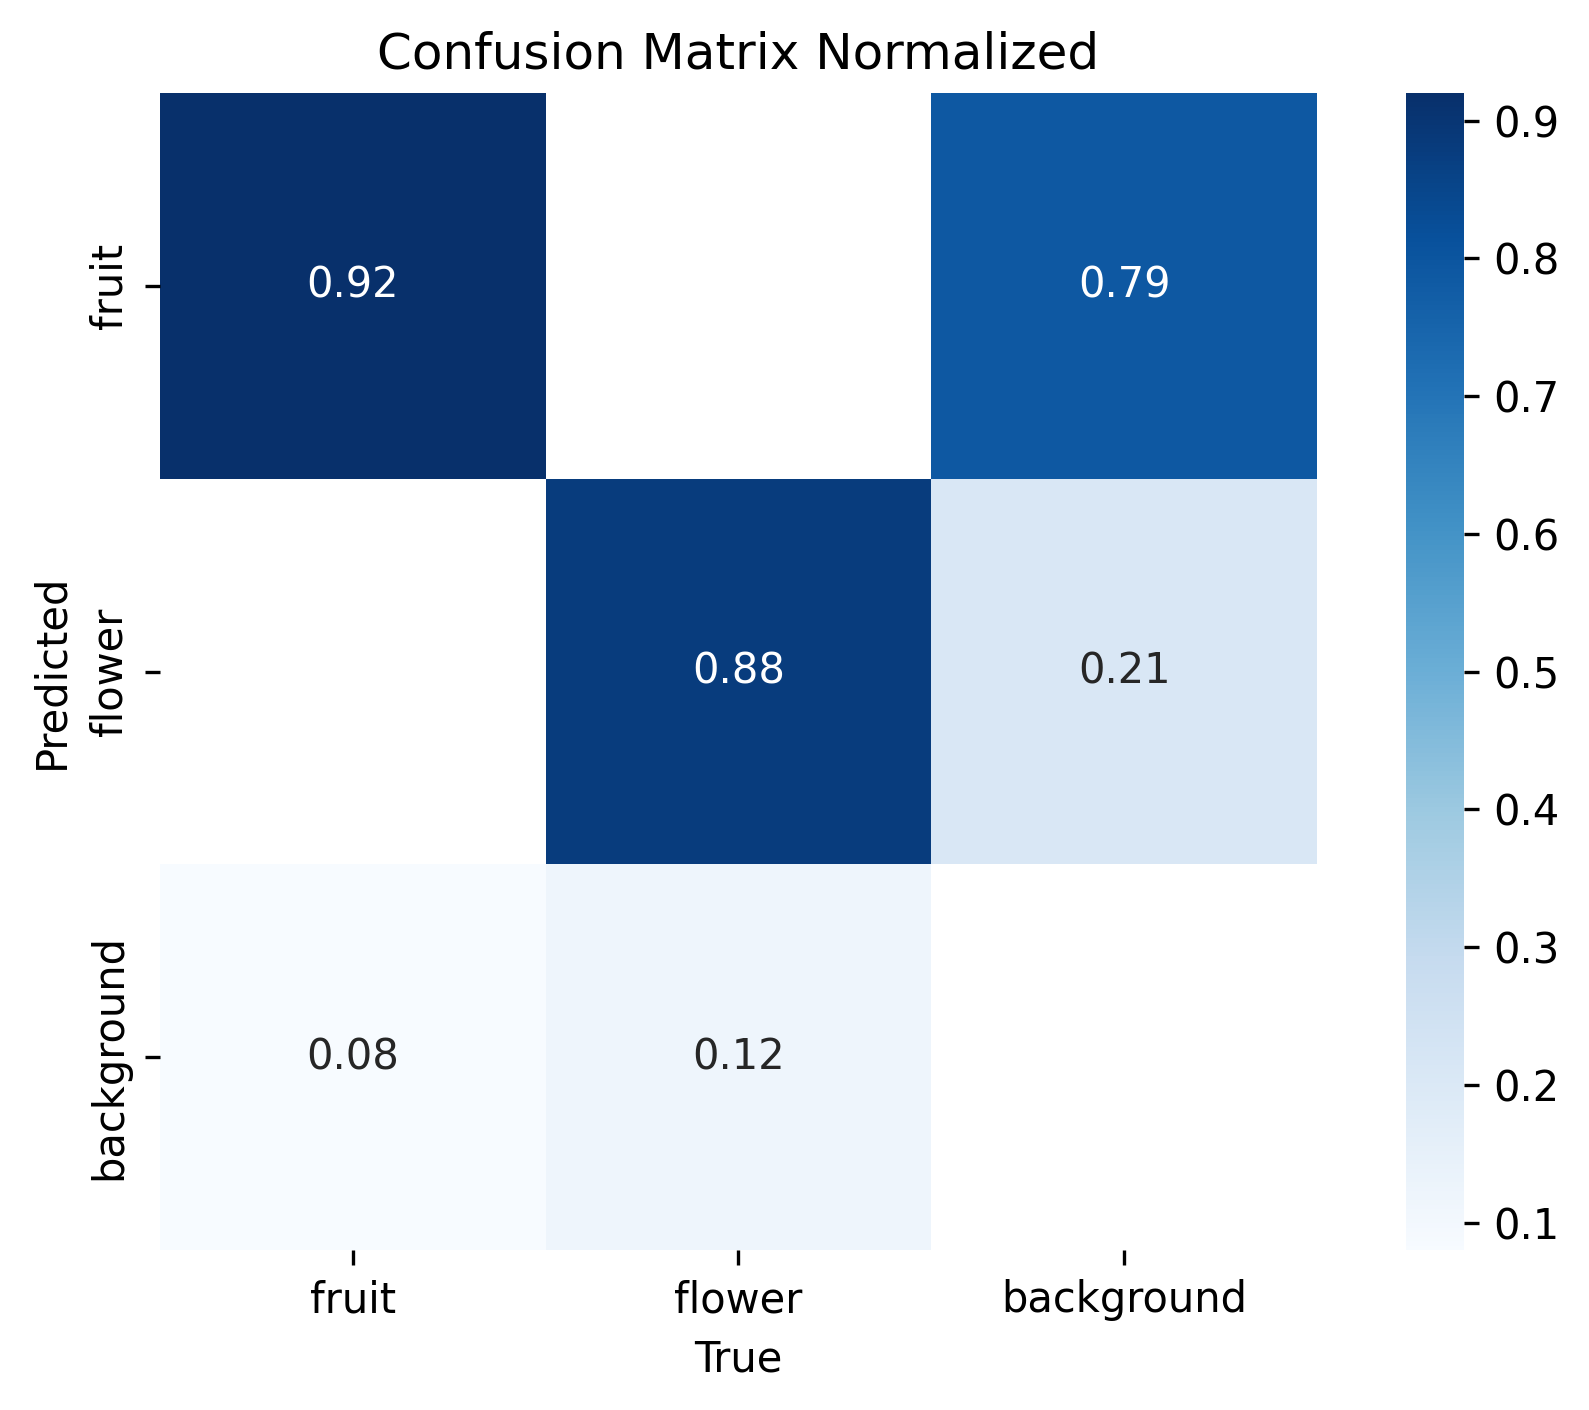

In [61]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

plt.style.use('default')

plt.figure(dpi=300)

# Confusion matrix 데이터
cm = np.array([
    [0.92, 0, 0.79],
    [0, 0.88, 0.21],
    [0.08, 0.12, 0]
])

# 라벨 설정
labels = ['fruit', 'flower', 'background']

# Heatmap 그리기
sns.heatmap(
    cm,
    annot=True,
    cmap="Blues",
    fmt='.2f',
    square=True,
    xticklabels=labels,
    yticklabels=labels,
    annot_kws={"size": 10},  # 숫자 크기 조정
    mask=(cm==0)
)

# 축 레이블 설정
plt.xlabel('True')
plt.ylabel('Predicted')

# 제목 설정
plt.title('Confusion Matrix Normalized', fontsize=12)

# 그래프 표시
plt.tight_layout()
plt.show()